In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


In [85]:
# Load preprocessed training data
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [86]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [87]:
x = df.drop(['reading_score'], axis=1)  
# because total_score is target variable and average is related to the total score
y = df['reading_score']           

In [88]:
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,88,247,82.333333
2,female,group B,master's degree,standard,none,90,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,44,148,49.333333
4,male,group C,some college,standard,none,76,75,229,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,65,195,65.000000
998,female,group D,some college,standard,completed,68,77,223,74.333333


In [89]:
num_col = x.select_dtypes(exclude='object').columns
cat_col = x.select_dtypes(include='object').columns

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe = OneHotEncoder(drop='first')
scalar = StandardScaler()

preprocessor = ColumnTransformer(
    [
    ("One Hot Encoder", ohe, cat_col),
    ("Standard Scaler", scalar, num_col)
    ]
)

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [93]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 16), (200, 16), (800,), (200,))

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return r2, mae, mse, rmse

In [95]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    print(model)
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)

    train_r2, train_mae, train_mse, train_rmse = evaluate_model(y_train, y_train_pred)
    test_r2, test_mae, test_mse, test_rmse = evaluate_model(y_test, y_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.values())[i])

    print(f"Train MSE:  {train_mse:.4f}")
    print(f"Train MAE:  {train_mae:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Train R2:   {train_r2:.4f}\n")

    print("-----------TESTING RESULTS-----------")
    print(f"Test MSE:   {test_mse:.4f}")
    print(f"Test MAE:   {test_mae:.4f}")
    print(f"Test RMSE:  {test_rmse:.4f}")
    print(f"Test R2:    {test_r2:.4f}\n")
    r2_list.append(test_r2)


LinearRegression()
Linear Regression
Train MSE:  0.0000
Train MAE:  0.0000
Train RMSE: 0.0000
Train R2:   1.0000

-----------TESTING RESULTS-----------
Test MSE:   0.0000
Test MAE:   0.0000
Test RMSE:  0.0000
Test R2:    1.0000

Ridge()
Ridge Regression
Train MSE:  0.1905
Train MAE:  0.3513
Train RMSE: 0.4364
Train R2:   0.9991

-----------TESTING RESULTS-----------
Test MSE:   0.2352
Test MAE:   0.3926
Test RMSE:  0.4850
Test R2:    0.9990

Lasso()
Lasso Regression
Train MSE:  12.2712
Train MAE:  2.8256
Train RMSE: 3.5030
Train R2:   0.9413

-----------TESTING RESULTS-----------
Test MSE:   13.6154
Test MAE:   2.9899
Test RMSE:  3.6899
Test R2:    0.9398

DecisionTreeRegressor()
Decision Tree
Train MSE:  0.0000
Train MAE:  0.0000
Train RMSE: 0.0000
Train R2:   1.0000

-----------TESTING RESULTS-----------
Test MSE:   9.9550
Test MAE:   2.4450
Test RMSE:  3.1552
Test R2:    0.9560

RandomForestRegressor()
Random Forest
Train MSE:  0.7955
Train MAE:  0.6907
Train RMSE: 0.8919
Train R2: 

In [96]:
pd.DataFrame(zip(model_list, r2_list), columns=["Model", "R2 Score"]).sort_values(by="R2 Score", ascending=False)

,Model,R2 Score
0,LinearRegression(),1.000000
1,Ridge(),0.998960
9,"XGBRegressor(base_score=None, booster=None, ca...",0.977015
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.970217
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.961514
3,DecisionTreeRegressor(),0.956007
6,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.942871
2,Lasso(),0.939831
8,KNeighborsRegressor(),0.912677
7,SVR(),0.829320


In [97]:
## BEST MODEL IS LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred = linear.predict(x_test)

accuracy = r2_score(y_test, y_pred)
print("Accuracy of Linear Regression Model:", accuracy)

Accuracy of Linear Regression Model: 1.0


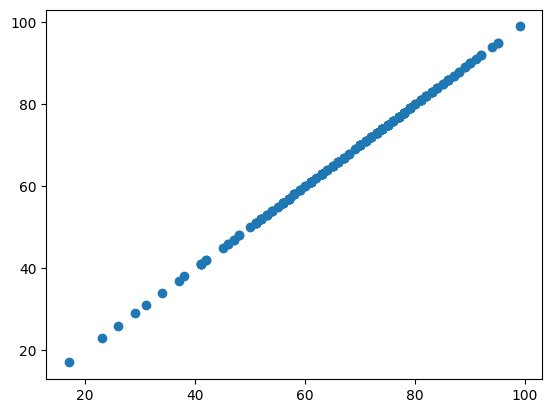

In [98]:
plt.scatter(x=y_test, y=y_pred)

<Axes: xlabel='reading_score'>

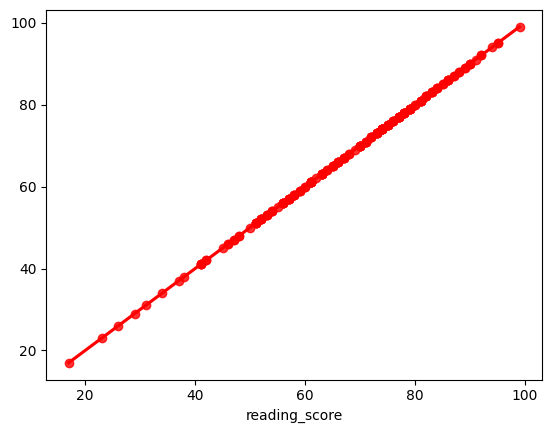

In [99]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [100]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})

,Actual,Predicted,Difference
521,86,86.0,4.263256e-14
737,66,66.0,0.000000e+00
740,73,73.0,0.000000e+00
660,77,77.0,-1.421085e-14
411,83,83.0,0.000000e+00
...,...,...,...
408,57,57.0,-7.105427e-15
332,56,56.0,-2.131628e-14
208,81,81.0,0.000000e+00
613,77,77.0,2.842171e-14
